In [19]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (15, 10)

# Sensor data
acceleration_data = np.loadtxt("./Data/Accelerometer.csv", dtype=float, delimiter=",", skiprows=1)
gyroscope_data = np.loadtxt("./Data/Gyroscope.csv", dtype=float, delimiter=",", skiprows=1)
location_data = np.loadtxt("./Data/Location.csv", dtype=float, delimiter=",", skiprows=1)

# NOTE: Usefull data in acceleration_data is 2nd column, and in gyroscope_data is 3rd column (0th column is time)

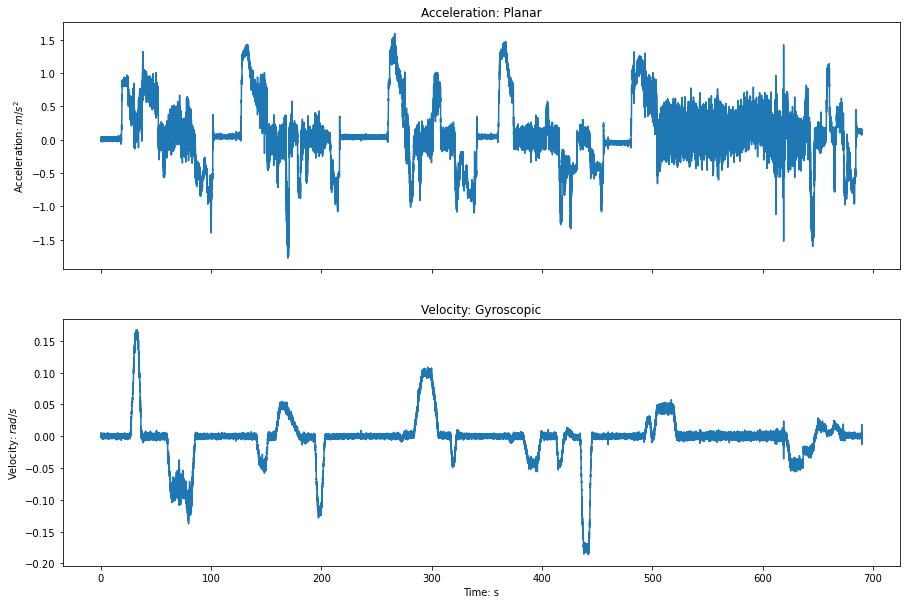

In [20]:
# Plotting
fig, axs = plt.subplots(2)
axs[0].set_title("Acceleration: Planar")
axs[0].plot(acceleration_data[:, 0], acceleration_data[:, 2])
axs[1].set_title("Velocity: Gyroscopic")
axs[1].plot(gyroscope_data[:, 0], gyroscope_data[:, 3])

for ax in axs.flat:
    ax.set(xlabel='Time: s')

axs[0].set(ylabel="Acceleration: $m/s^2$")
axs[1].set(ylabel="Velocity: $rad/s$")

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()

plt.show()

In [21]:
# Variables for processing
pos = np.zeros((len(acceleration_data), 2))
velocity = np.zeros((len(acceleration_data), 2))
angle = np.zeros(len(acceleration_data))

In [30]:
for t in range(1, len(acceleration_data)):
    dt = acceleration_data[t, 0] - acceleration_data[t - 1, 0]
    angle[t] = angle[t - 1] + gyroscope_data[t - 1, 3] * dt
    velocity[t] = velocity[t - 1] + np.array([acceleration_data[t - 1, 2] * np.cos(angle[t]), acceleration_data[t - 1, 2] * np.sin(angle[t])]) * dt
    pos[t] = pos[t - 1] + velocity[t] * dt

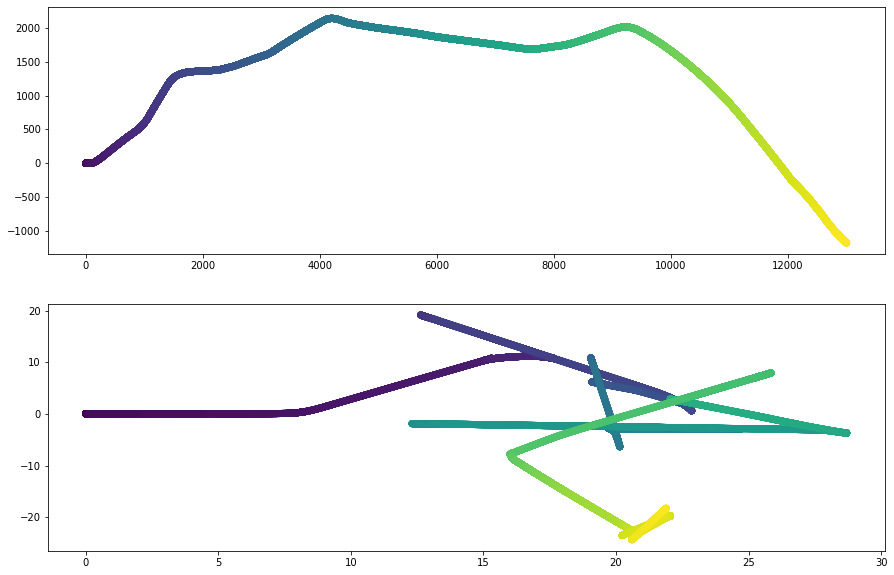

In [31]:
# Plotting
fig, axs = plt.subplots(2)
axs[0].scatter(pos[:, 0], pos[:, 1], c=acceleration_data[:, 0])
axs[1].scatter(velocity[:, 0], velocity[:, 1], c=acceleration_data[:, 0])

plt.show()